In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
image_folder = 'images/images'
image_properties = pd.read_json('images/image_props.json')
image_properties = image_properties.transpose()
image_properties = image_properties.set_index('num')

In [19]:
fer = image_properties.loc[image_properties['database'] == 'fer',
                           'emotion']
ck = image_properties.loc[image_properties['database'] == 'ck',
                          'emotion']
fer_counts = np.unique(fer, return_counts=True)
ck_counts = np.unique(ck, return_counts=True)

In [32]:
df = pd.DataFrame(fer_counts[1], fer_counts[0])
df = df.transpose()
new_row = {}
new_row['anger'] = ck_counts[1][0]
new_row['disgust'] = ck_counts[1][1]
new_row['fear'] = ck_counts[1][2]
new_row['happy'] = ck_counts[1][3]
new_row['neutral'] = 0
new_row['sadness'] = ck_counts[1][4]
new_row['surprise'] = ck_counts[1][5]
df = df.append(new_row, ignore_index=True)
new_col = [fer.count(), ck.count()]
df['total'] = new_col
df

,anger,disgust,fear,happy,neutral,sadness,surprise,total
0,4953,547,5121,8989,6198,6077,4002,35887
1,135,177,75,207,0,84,249,927


In [91]:
percent_df = pd.DataFrame({'emotion': [], 'database': [], 'percent of images': []})
for i, emotion in enumerate(['anger', 'disgust', 'fear', 'happy', 'neutral', 'sadness', 'surprise']):
    percent_df = percent_df.append({'emotion': emotion, 'database': 'FER', 'percent of images': df[emotion][0] / df['total'][0]}, ignore_index=True)
    percent_df = percent_df.append({'emotion': emotion, 'database': 'CK', 'percent of images': df[emotion][1] / df['total'][1]}, ignore_index=True)
percent_df

,emotion,database,percent of images
0,anger,FER,0.138017
1,anger,CK,0.145631
2,disgust,FER,0.015242
3,disgust,CK,0.190939
4,fear,FER,0.142698
5,fear,CK,0.080906
6,happy,FER,0.250481
7,happy,CK,0.223301
8,neutral,FER,0.172709
9,neutral,CK,0.000000


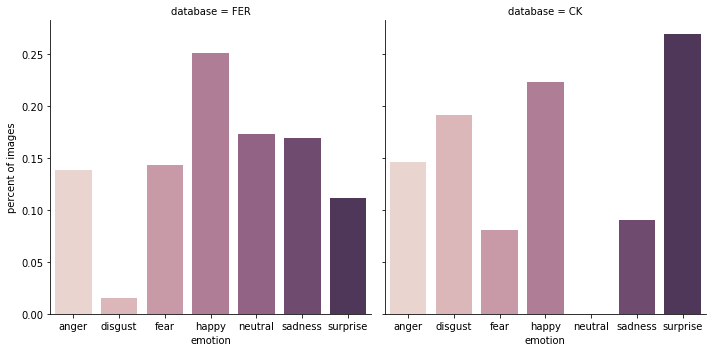

In [99]:
x = sns.catplot(x='emotion',
                y='percent of images',
                data=percent_df,
                palette=sns.cubehelix_palette(8),
                col='database',
                kind='bar')
x.savefig('images/train_distribution.png')

In [138]:
train_loss = [1.5495, 1.2991, 1.2082, 1.1293, 1.0597, 0.9922]
train_acc = [0.3958, 0.5066, 0.5400, 0.5762, 0.6075, 0.6373]
val_loss = [1.4087, 1.4015, 1.2102, 1.1781, 1.2000, 1.2187]
val_acc = [0.4533, 0.4471, 0.5426, 0.5559, 0.5644, 0.5638]
df = pd.DataFrame({'epoch': [], 'metric': [], 'set': [], 'value': []})
for epoch in range(6):
    df = df.append({'epoch': epoch,
                    'metric': 'loss',
                    'set': 'training',
                    'value': train_loss[epoch]},
                   ignore_index=True)
    df = df.append({'epoch': epoch,
                    'metric': 'accuracy',
                    'set': 'training',
                    'value': train_acc[epoch]},
                   ignore_index=True)
    df = df.append({'epoch': epoch,
                    'metric': 'loss',
                    'set': 'validation',
                    'value': val_loss[epoch]},
                    ignore_index=True)
    df = df.append({'epoch': epoch,
                    'metric': 'accuracy',
                    'set': 'validation',
                    'value': val_acc[epoch]},
                    ignore_index=True)
df

,epoch,metric,set,value
0,0.0,loss,training,1.5495
1,0.0,accuracy,training,0.3958
2,0.0,loss,validation,1.4087
3,0.0,accuracy,validation,0.4533
4,1.0,loss,training,1.2991
5,1.0,accuracy,training,0.5066
6,1.0,loss,validation,1.4015
7,1.0,accuracy,validation,0.4471
8,2.0,loss,training,1.2082
9,2.0,accuracy,training,0.5400


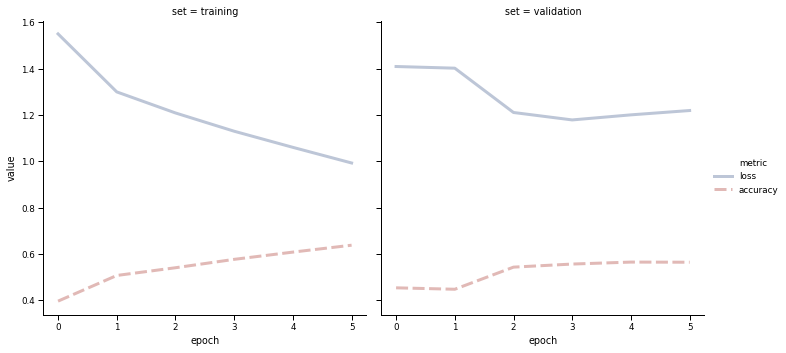

In [161]:
sns.set_context(rc={'lines.linewidth': 3})
x = sns.relplot(x='epoch',
                y='value',
                col='set',
                hue='metric',
                data=df,
                kind='line',
                style='metric',
                palette='vlag')
x.savefig('images/loss_acc.png')

In [172]:
df = pd.read_csv('images/adv_test_preds.csv')
df = df.replace('ANGER', 'anger')
df = df.replace('DISGUST', 'disgust')
df = df.replace('FEAR', 'fear')
df = df.replace('HAPPINESS', 'happy')
df = df.replace('happiness', 'happy')
df = df.replace('NEUTRAL', 'neutral')
df = df.replace('SADNESS', 'sadness')
df = df.replace('SURPRISE', 'surprise')
df = df.drop(df[df.real_emotion == 'contempt'].index)
df

,file_id,emotion,real_emotion,anger,disgust,fear,happiness,sadness,surprise,neutral
0,Kevin_Gil_0001.jpg,sadness,neutral,0.057243,0.003230,0.177577,0.039147,0.556004,0.004836,0.161963
1,Gerry_Kelly_0001.jpg,fear,neutral,0.121609,0.014324,0.391927,0.026940,0.260369,0.059324,0.125508
2,Eliane_Karp_0003.jpg,happy,happy,0.007785,0.000403,0.018213,0.944553,0.007920,0.011657,0.009469
3,Vojislav_Kostunica_0006.jpg,neutral,happy,0.096124,0.003883,0.187432,0.052538,0.248460,0.020525,0.391038
4,Phil_Johnson_0001.jpg,neutral,neutral,0.174017,0.008790,0.218756,0.028613,0.109801,0.117697,0.342326
...,...,...,...,...,...,...,...,...,...,...
13675,Angelica_Romero_0001.jpg,neutral,neutral,0.126883,0.012378,0.234021,0.064815,0.115892,0.140751,0.305261
13676,Peter_Costello_0002.jpg,happy,happy,0.084163,0.028078,0.073996,0.471927,0.283016,0.006618,0.052204
13677,Christine_Todd_Whitman_0004.jpg,happy,happy,0.133732,0.185587,0.051502,0.450496,0.073505,0.010081,0.095097
13678,Roger_Grimes_0001.jpg,happy,happy,0.067961,0.023770,0.052142,0.709078,0.109605,0.004871,0.032574


In [248]:
emotions = ['anger',
            'fear',
            'disgust',
            'happy',
            'sadness',
            'surprise',
            'neutral']
confusion_counts = []
for emotion_1 in emotions:
    new_row = []
    for emotion_2 in emotions:
        new_row.append(np.count_nonzero(df.loc[(df.emotion == emotion_2) & (df.real_emotion == emotion_1)]) / np.count_nonzero(df.loc[(df.real_emotion == emotion_1)]))
    confusion_counts.append(new_row)

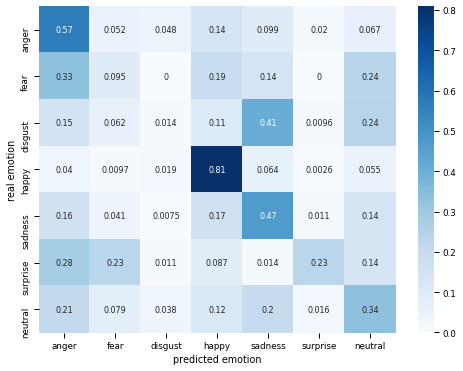

In [249]:
plt.figure(figsize=(8, 6))
x = sns.heatmap(confusion_counts,
                annot=True,
                annot_kws={'size': 8},
                cmap='Blues',
                xticklabels=emotions,
                yticklabels=emotions)
x.set_xlabel('predicted emotion')
x.set_ylabel('real emotion')
plt.savefig('images/confusion_1.png')

In [253]:
emotions_alt = ['anger',
                'fear',
                'disgust',
                'sadness',
                'surprise',
                'neutral']
confusion_counts = []
for emotion_1 in emotions_alt:
    new_row = []
    for emotion_2 in emotions_alt:
        new_row.append(np.count_nonzero(df.loc[(df.emotion == emotion_2) & (df.real_emotion == emotion_1)]) / np.count_nonzero(df.loc[(df.real_emotion == emotion_1)]))
    confusion_counts.append(new_row)

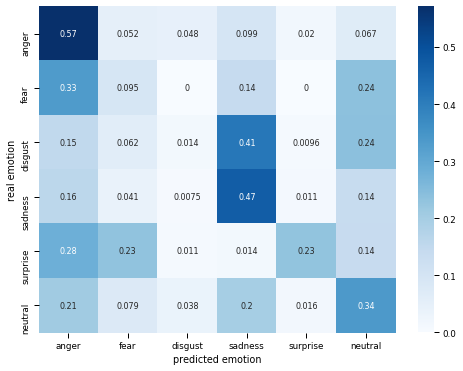

In [254]:
plt.figure(figsize=(8, 6))
x = sns.heatmap(confusion_counts,
                annot=True,
                annot_kws={'size': 8},
                cmap='Blues',
                xticklabels=emotions_alt,
                yticklabels=emotions_alt)
x.set_xlabel('predicted emotion')
x.set_ylabel('real emotion')
plt.savefig('images/confusion_2.png')